# **Data Science Project On Customer Transaction**

## *Business Case* :     *Based on given feature of dataset we need to predict which customer make transaction in the future irrespective of the amount of money transacted*.

## *Task* : Binary Classification Task

## *Necessary Library*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## *Load dataset*

In [ ]:
#loading the dataset
data = pd.read_csv("train(1).csv")
data


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


## *Domain Analysis*

### Introduction

 * The dataset contain 200000 observation with 202 columns with 200 columns having values for var_1 to var_200, one column for ID code and one column for target with the problem of identification of the customers who will make a transaction with the bank in future, irrespective of the amount of money transacted previously with the bank.
 * We have the target columns means it is a supervised Machine learning.

### Target column(0,1)

* 0 represent -- customer did not do a transaction
* 1 represent -- customer did  do a transaction

## *Basic checks*

In [ ]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [ ]:
data.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

* Total 202 columns with one unique column.

### Examine the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
data.shape

(200000, 202)

### Statistical measure of data

In [ ]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


* No constant column present in the data.

In [ ]:
data.describe(include = "O")

,ID_code
count,200000
unique,200000
top,train_0
freq,1


## *Explortary Data Analysis*

### Target column

In [ ]:
data.target.value_counts()

,count
target,
0,179902
1,20098


<Axes: xlabel='target', ylabel='count'>

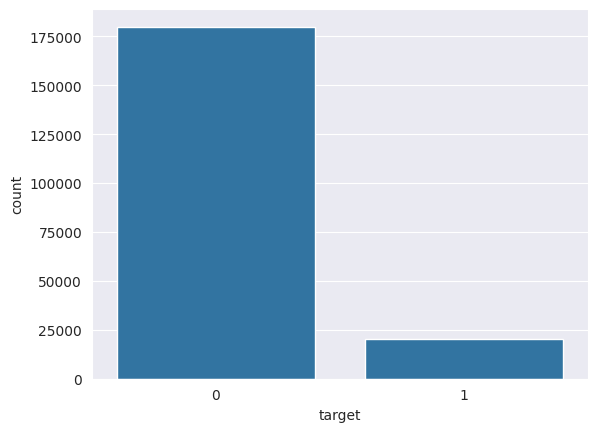

In [ ]:
sns.countplot(x = 'target', data=data)

* In this plot we are clearly seen the 90% customer are did not do a transaction and 10% customer are did do the transaction
* This target feature is imbalance so we need to balance the data with the help of oversampling.

### Checking for distribution of first 100 feature

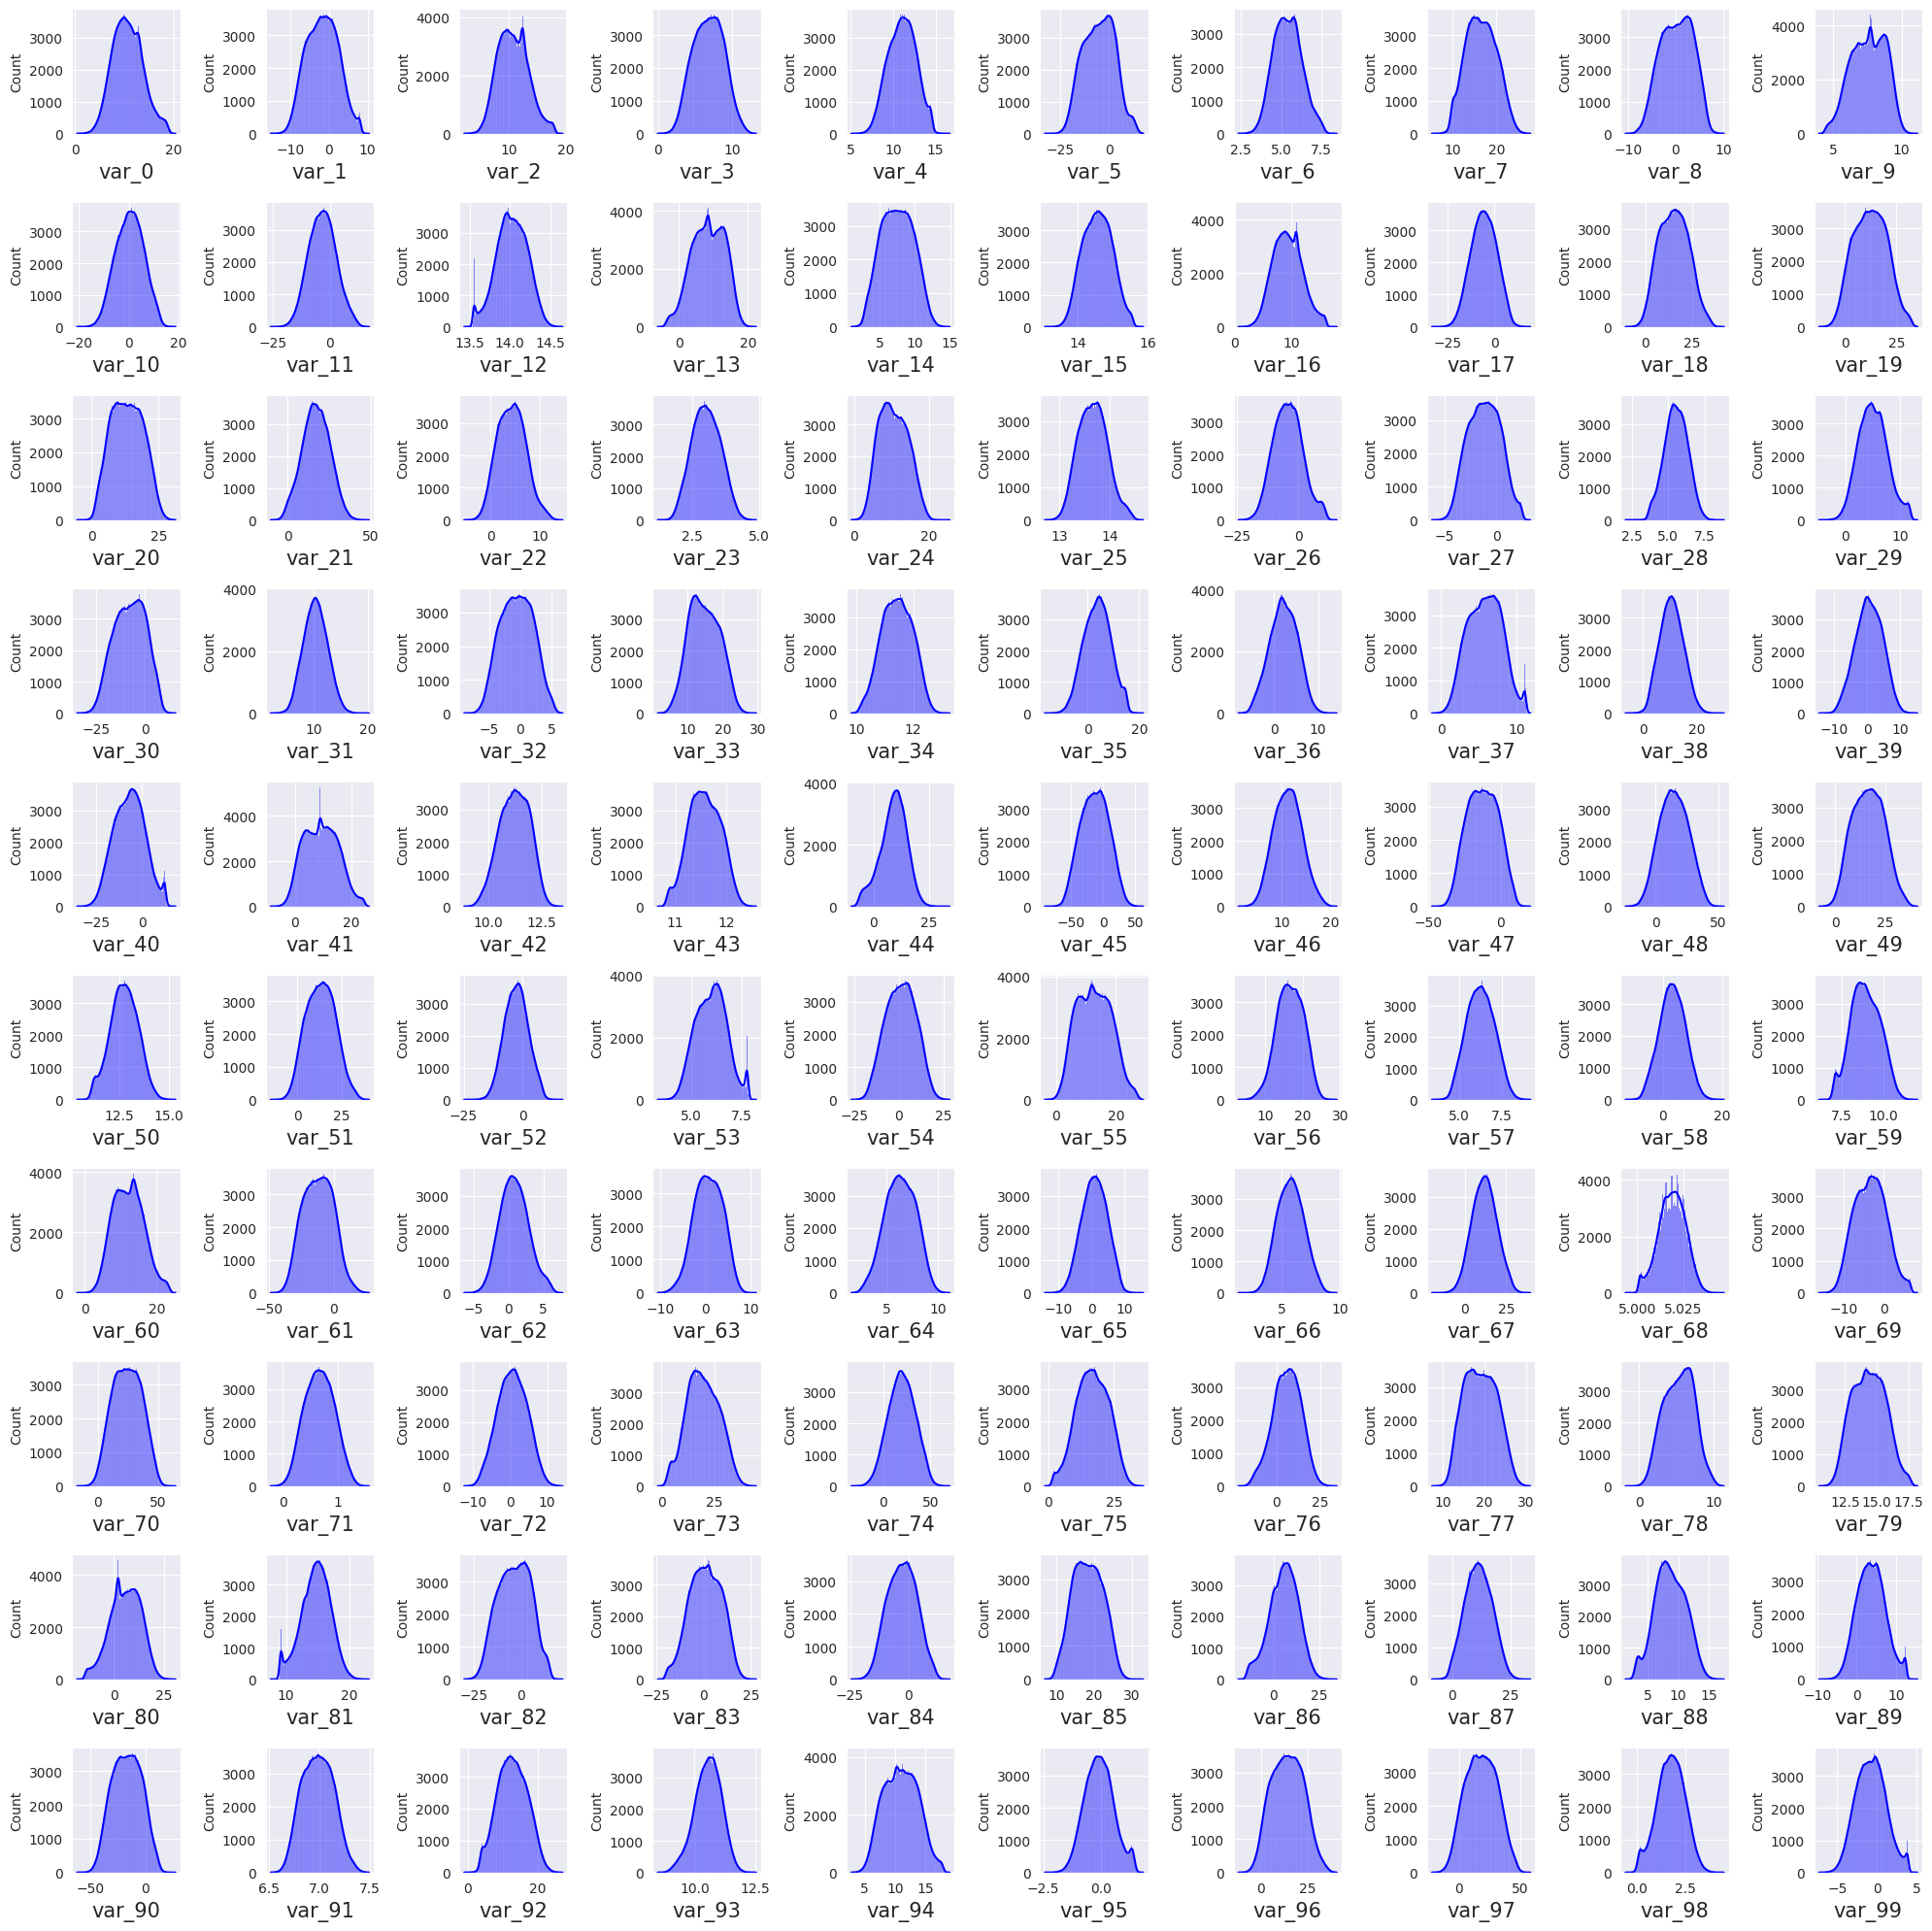

In [ ]:
dist = data.iloc[:,2:102]
plt.figure(figsize=(20,20),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist: # Itreting the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 column
        sns.histplot(dist[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=15) # name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show()

### checking for next features

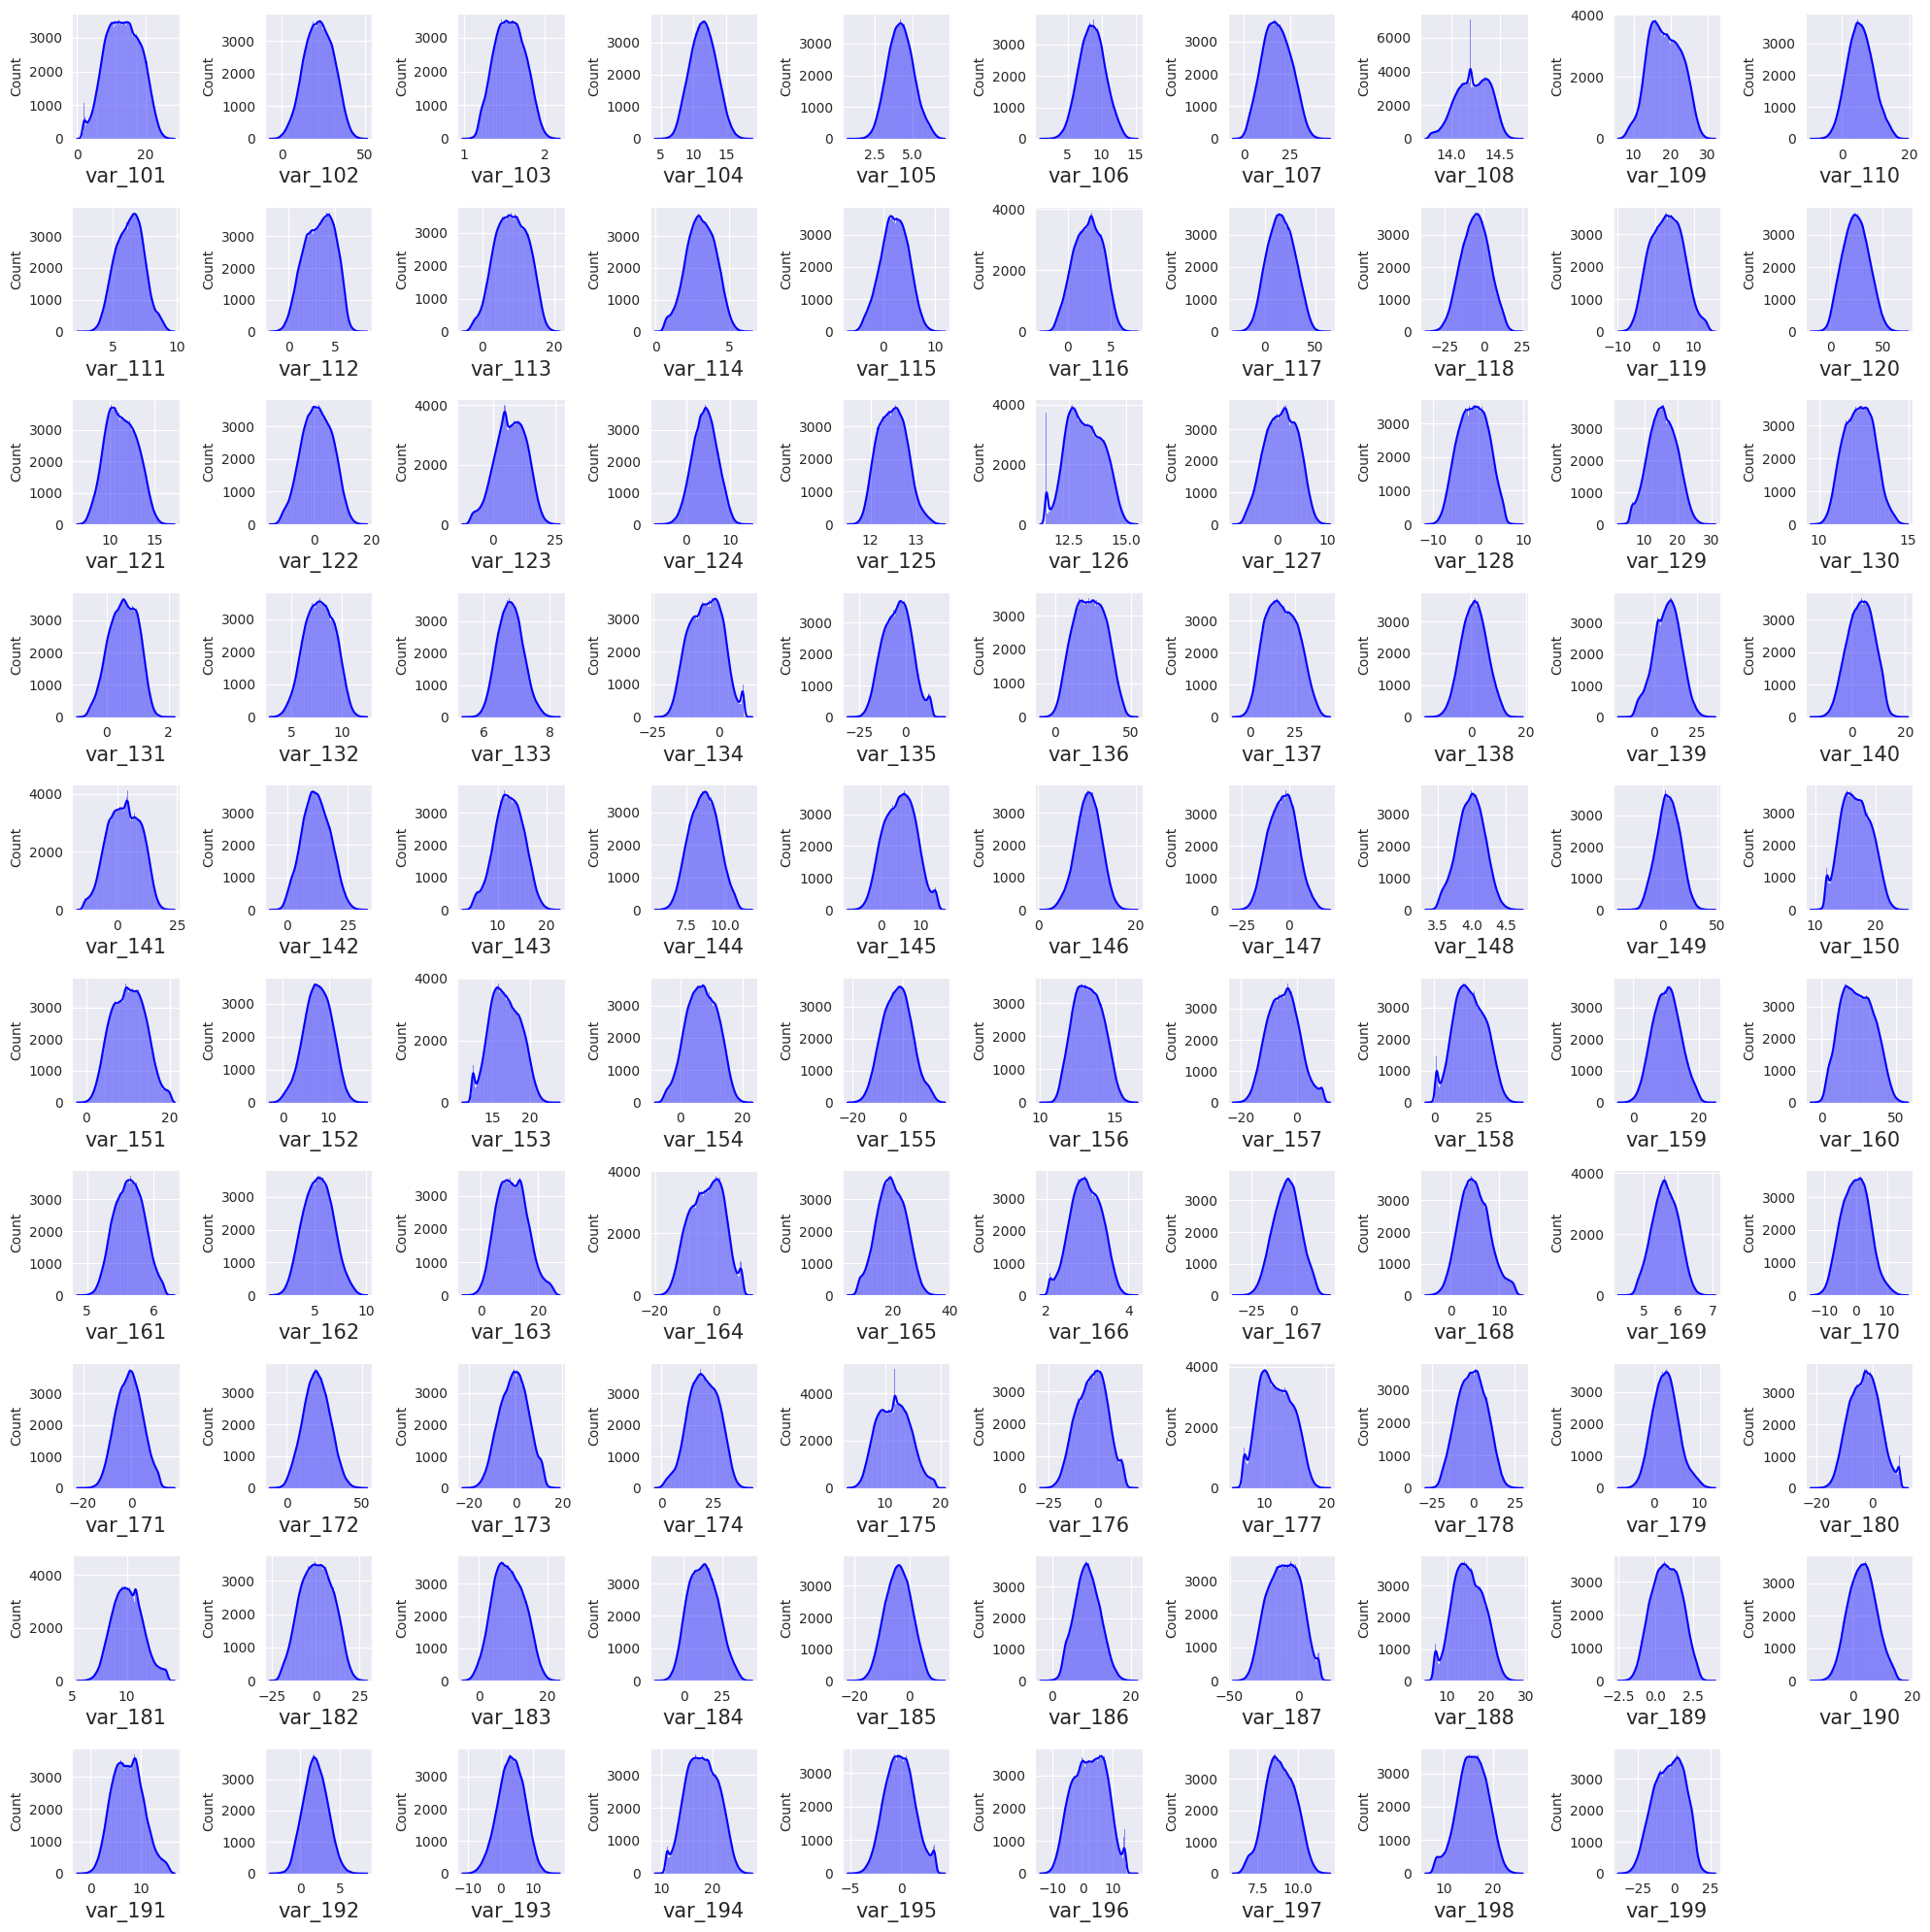

In [ ]:
dist1 = data.iloc[:,103:]
plt.figure(figsize=(20,20),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist1: # Itreting the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 column
        sns.histplot(dist1[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=15) # name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show()

#### Observation

* From the above graph we clearly understand that most of the feature the normal distribution so we need not to use feature transformation technique.

## Statistical Analysis

### Distribution of mean of the data

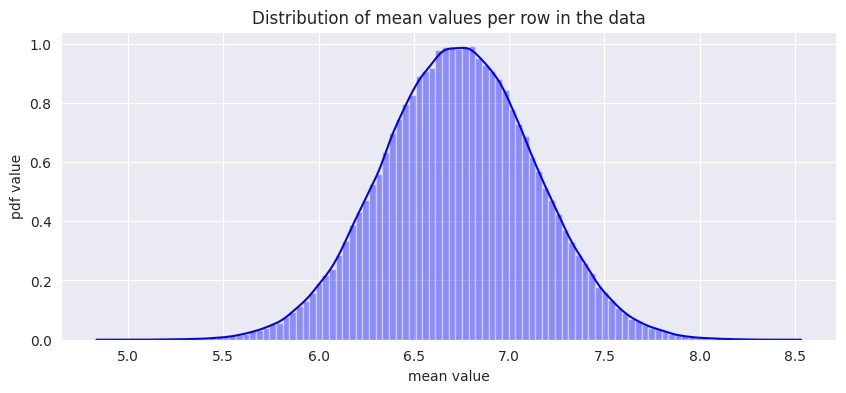

In [ ]:
plt.figure(figsize=(10,4))
features = data.columns.values[1:202]
plt.title('Distribution of mean values per row in the data')
plt.xlabel('mean value')
plt.ylabel('pdf value')
sns.distplot(data[features].mean(axis=1),color='blue', kde=True,bins=100)
plt.show()

### Distribution of standard deviation of data

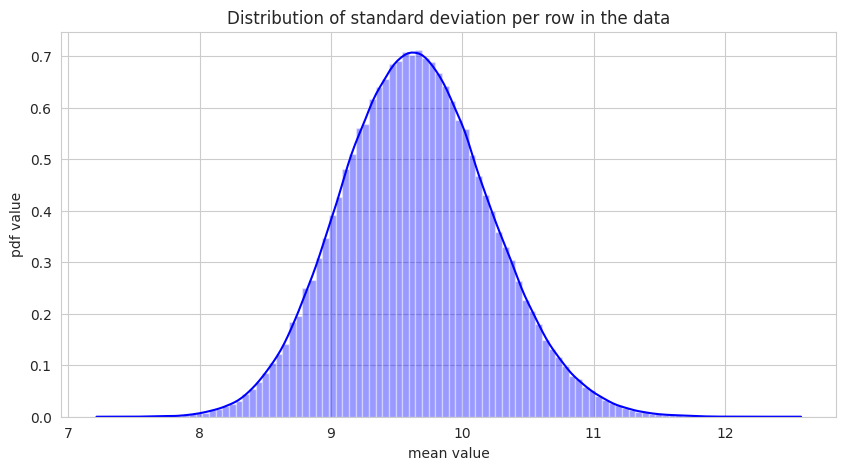

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
feature = data.columns.values[1:202]
plt.title("Distribution of standard deviation per row in the data")
plt.xlabel("mean value")
plt.ylabel("pdf value")
sns.distplot(data[feature].std(axis=1), color = 'blue', kde = True , bins = 100)
plt.show()

#### Obseravtion

* This graph looks like normal distribution around 60% of feature standard deviation around range of 9 to 10

## *Data Preprocessing*

### Handling the missing values

In [ ]:
# missing values
data.isnull().sum()

,0
ID_code,0
target,0
var_0,0
var_1,0
var_2,0
...,...
var_195,0
var_196,0
var_197,0
var_198,0


* This dataset have no missing values.

### Scalling the dataset

* Here we use robust scaling because te dataset contains outliers but follow the normal distribution
* Robust scalling makes the data look similar to standardization in term of range,it brings the median to 0 and scales based on thr interquartile range instead of the standard deviation.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7','var_8','var_9','var_10','var_11','var_12','var_13',
      'var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26',
      'var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39',
      'var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52',
      'var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65',
      'var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78',
      'var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91',
      'var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103',
      'var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114',
      'var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125',
      'var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137',
      'var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149',
      'var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161',
      'var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173',
      'var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185',
      'var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197',
      'var_198','var_199',]] = scaler.fit_transform(data[['var_0','var_1','var_2','var_3','var_4','var_5','var_6','var_7',
      'var_8','var_9','var_10','var_11','var_12','var_13',
      'var_14','var_15','var_16','var_17','var_18','var_19','var_20','var_21','var_22','var_23','var_24','var_25','var_26',
      'var_27','var_28','var_29','var_30','var_31','var_32','var_33','var_34','var_35','var_36','var_37','var_38','var_39',
      'var_40','var_41','var_42','var_43','var_44','var_45','var_46','var_47','var_48','var_49','var_50','var_51','var_52',
      'var_53','var_54','var_55','var_56','var_57','var_58','var_59','var_60','var_61','var_62','var_63','var_64','var_65',
      'var_66','var_67','var_68','var_69','var_70','var_71','var_72','var_73','var_74','var_75','var_76','var_77','var_78',
      'var_79','var_80','var_81','var_82','var_83','var_84','var_85','var_86','var_87','var_88','var_89','var_90','var_91',
      'var_92','var_93','var_94','var_95','var_96','var_97','var_98','var_99','var_100','var_101','var_102','var_103',
      'var_104','var_105','var_106','var_107','var_108','var_109','var_110','var_111','var_112','var_113','var_114',
      'var_115','var_116','var_117','var_118','var_119','var_120','var_121','var_122','var_123','var_124','var_125',
      'var_126','var_127','var_128','var_129','var_130','var_131','var_132','var_133','var_134','var_135','var_136','var_137',
      'var_138','var_139','var_140','var_141','var_142','var_143','var_144','var_145','var_146','var_147','var_148','var_149',
      'var_150','var_151','var_152','var_153','var_154','var_155','var_156','var_157','var_158','var_159','var_160','var_161',
      'var_162','var_163','var_164','var_165','var_166','var_167','var_168','var_169','var_170','var_171','var_172','var_173',
      'var_174','var_175','var_176','var_177','var_178','var_179','var_180','var_181','var_182','var_183','var_184','var_185',
      'var_186','var_187','var_188','var_189','var_190','var_191','var_192','var_193','var_194','var_195','var_196','var_197',
      'var_198','var_199']])

In [ ]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,train_1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,...,0.686540,0.085795,0.331306,1.344064,-0.530228,1.103135,0.672394,-0.074077,0.571886,0.297368
2,train_2,0,-0.445003,-0.186541,0.395469,0.347815,-0.221094,-0.350556,1.260908,-0.356903,...,-0.046079,0.560891,-0.112102,-0.304303,0.764938,1.656951,-1.050161,-0.463036,-0.286149,0.200436
3,train_3,0,0.124444,-0.089159,-0.429020,0.120748,0.620850,0.247176,0.370517,-0.296912,...,0.195359,-0.598020,-0.574591,-0.351340,1.065039,-0.548868,-0.627542,1.047370,0.480670,-0.385163
4,train_4,0,-0.159803,0.020439,0.604761,-0.061074,0.491579,0.600549,0.449607,0.541684,...,-0.726076,0.499102,-0.996298,1.031426,-0.979782,-0.669600,0.178488,0.458709,0.487211,-0.373372


## Feature Selection

### Dropling the column

In [ ]:
data.drop('ID_code' , axis = 1 , inplace = True)

In [ ]:
data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,-0.371543,-0.849081,0.350032,-0.564165,0.148216,-0.367026,-0.215656,0.420577,-1.011036,...,0.190533,-0.776912,0.599643,-0.303378,0.118478,-1.112383,0.643194,-0.242223,-0.744683,0.107705
1,0,0.226713,-0.416363,0.864155,-0.467749,0.527324,0.979489,0.190804,0.014925,0.523831,...,0.686540,0.085795,0.331306,1.344064,-0.530228,1.103135,0.672394,-0.074077,0.571886,0.297368
2,0,-0.445003,-0.186541,0.395469,0.347815,-0.221094,-0.350556,1.260908,-0.356903,-1.010902,...,-0.046079,0.560891,-0.112102,-0.304303,0.764938,1.656951,-1.050161,-0.463036,-0.286149,0.200436
3,0,0.124444,-0.089159,-0.429020,0.120748,0.620850,0.247176,0.370517,-0.296912,-1.190060,...,0.195359,-0.598020,-0.574591,-0.351340,1.065039,-0.548868,-0.627542,1.047370,0.480670,-0.385163
4,0,-0.159803,0.020439,0.604761,-0.061074,0.491579,0.600549,0.449607,0.541684,1.117206,...,-0.726076,0.499102,-0.996298,1.031426,-0.979782,-0.669600,0.178488,0.458709,0.487211,-0.373372


### Checking for correlection

In [ ]:
data.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


<Axes: >

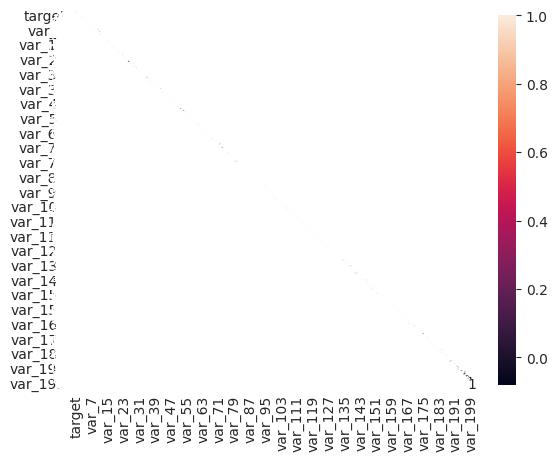

In [ ]:
sns.heatmap(data.corr(), annot = True)

* From the above we can clearly understand that there is no highly correleted feature in data

### Checking for duplicate value

In [ ]:
data.duplicated().sum()

0

* The data doesn't contain any duplicate value.

### Principle Componenet Analysis

* We can reduce the feature using PCA

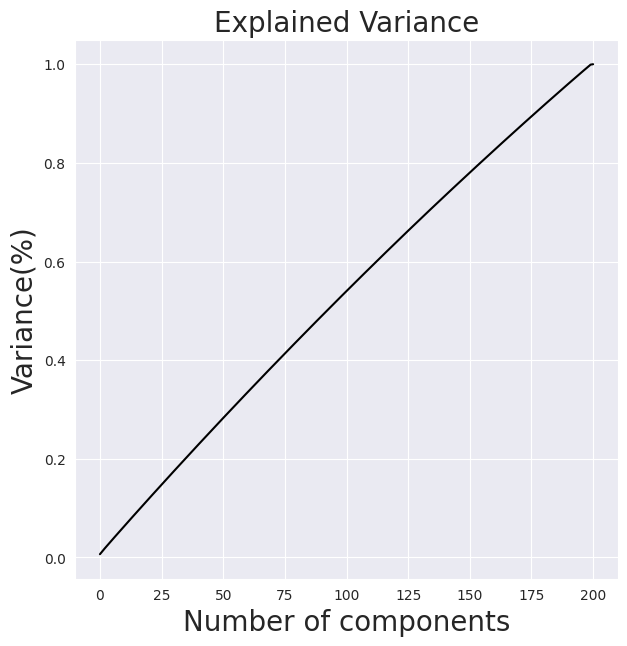

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principle_component = pca.fit_transform(data)  # Fitting the data
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

#### Observation

* Number of component is straight means the feature is more important so we have to select 175 feature beacause of less loss of variance.

In [ ]:
pca = PCA(n_components=175)
new_data = pca.fit_transform(data)
new_data

array([[ 0.51758867,  0.26955976,  0.05402251, ..., -0.91197506,
         0.02825685, -0.01823824],
       [-1.32400732, -0.53357927,  1.95817087, ..., -0.11897006,
        -0.04993349, -0.091531  ],
       [ 0.04224386, -0.81522866, -0.3257926 , ..., -0.04433698,
        -1.15220835, -0.52020052],
       ...,
       [-0.01423866,  0.55522966,  0.65142503, ..., -0.13624811,
        -0.40374922,  0.61777042],
       [ 0.40689894,  0.23820526,  0.38221209, ...,  0.55847262,
         0.11239184, -0.75789081],
       [ 0.76575485, -0.16503883,  0.39951196, ..., -1.09182605,
        -0.47622989,  0.67725346]])

In [ ]:
data_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33','pca34',
                            'pca35','pca36','pca37','pca38','pca39','pca40','pca41','pca42','pca43','pca44','pca45','pca46',
                            'pca47','pca48','pca49','pca50','pca51','pca52','pca53','pca54','pca55','pca56','pca57','pca58',
                            'pca59','pca60','pca61','pca62','pca63','pca64','pca65','pca66','pca67','pca68','pca69','pca70',
                            'pca71','pca72','pca73','pca74','pca75','pca76','pca77','pca78','pca79','pca80','pca81','pca82',
                            'pca83','pca84','pca85','pca86','pca87','pca88','pca89','pca90','pca91','pca92','pca93','pca94',
                            'pca95','pca96','pca97','pca98','pca99','pca100','pca101','pca102','pca103','pca104','pca105',
                            'pca106','pca107','pca108','pca109','pca110','pca111','pca112','pca113','pca114','pca115','pca116',
                            'pca117','pca118','pca119','pca120','pca121','pca122','pca123','pca124','pca125','pca126','pca127',
                            'pca128','pca129','pca130','pca131','pca132','pca133','pca134','pca135','pca136','pca137','pca138',
                            'pca139','pca140','pca141','pca142','pca143','pca144','pca145','pca146','pca147','pca148','pca149',
                            'pca150','pca151','pca152','pca153','pca154','pca155','pca156','pca157','pca158','pca159','pca160',
                            'pca161','pca162','pca163','pca164','pca165','pca166','pca167','pca168','pca169','pca170',
                            'pca171','pca172','pca173','pca174','pca175'])
data_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca166,pca167,pca168,pca169,pca170,pca171,pca172,pca173,pca174,pca175
0,0.517589,0.269560,0.054023,-0.369893,0.835381,0.662795,1.319730,1.064223,-0.849499,0.433281,...,-0.554410,-0.611039,1.112001,-0.258308,-0.751815,0.967646,-0.750007,-0.911975,0.028257,-0.018238
1,-1.324007,-0.533579,1.958171,1.308587,0.328150,0.049564,-1.179654,0.139923,0.443926,0.601061,...,-0.807269,0.357139,-1.262798,-0.132334,0.126031,0.782291,0.295756,-0.118970,-0.049933,-0.091531
2,0.042244,-0.815229,-0.325793,0.225673,-0.013017,0.143188,0.106796,-0.226355,-0.768914,0.082743,...,0.571805,0.691044,0.271241,-0.335684,-0.558622,0.601425,-0.833146,-0.044337,-1.152208,-0.520201
3,-1.384955,0.367701,0.459503,-0.644095,0.384638,-0.117310,-1.266890,0.159772,0.618706,0.584172,...,1.503312,0.682461,-0.035037,0.304494,-0.194574,-0.874634,-0.182145,0.717708,0.512492,0.430749
4,-0.592824,-0.160891,0.584662,-0.840627,-0.147873,0.404153,0.678792,-0.868974,-0.354538,-0.451727,...,-0.459845,-0.455293,-0.147366,1.475875,0.264492,0.164119,-0.102101,0.239766,-0.584007,-0.161014


## *Model Creation*

### Here we use 4 differnt algorithm for getting best result

* LogisticRegression
* Desision Tree
* XGB Classifier
* Artifical Neural Network

### Dependent and Independent

In [ ]:
x = data_df
y = data.target

### Balancing the data

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
x_smote,y_smote = sm.fit_resample(x,y)
print("balanced data:    :",Counter(y_smote))

unbalanced data   :   Counter({0: 179902, 1: 20098})
balanced data:    : Counter({0: 179902, 1: 179902})


### Split and train data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size =0.3,random_state=42)

In [ ]:
x_train.shape

(251862, 175)

In [ ]:
y_train.shape

(251862,)

## 1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

## Evalution

### Testing Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
acc = accuracy_score(y_pred,y_test)
print("Training accuracy of Logistic regression model",acc*100)
print("Logistic regression training Classification report: \n",classification_report(y_pred,y_test))

Training accuracy of Logistic regression model 83.3864482777788
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83     53343
           1       0.84      0.83      0.83     54599

    accuracy                           0.83    107942
   macro avg       0.83      0.83      0.83    107942
weighted avg       0.83      0.83      0.83    107942



In [ ]:
lr_f1_score = f1_score(y_pred , y_test)
print('f1_score' ,lr_f1_score*100 )

f1_score 83.47843711708724


. The accuracy of the model is not good.

# 2.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

dec_tree.fit(x_train , y_train)

DecisionTreeClassifier()

In [ ]:
dec_tree_pred = dec_tree.predict(x_test)
dec_tree_pred

array([0, 1, 1, ..., 1, 0, 0])

## Evalution

### Testing Accuracy

In [ ]:
dec_acc = accuracy_score(y_pred,y_test)
print("Training accuracy of Logistic regression model",dec_acc*100)
print("Logistic regression training Classification report: \n",classification_report(y_pred,y_test))

Training accuracy of Logistic regression model 83.3864482777788
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83     53343
           1       0.84      0.83      0.83     54599

    accuracy                           0.83    107942
   macro avg       0.83      0.83      0.83    107942
weighted avg       0.83      0.83      0.83    107942



In [ ]:
dce_tree_f1_score = f1_score(dec_tree_pred , y_test)
print('f1_score' ,dce_tree_f1_score*100 )

f1_score 83.88723686945832


### Hyperparameter tunning

. After hyperparameter tunning also the accuracy of the model does not increased.

## 3.XGBClassifier

In [ ]:
import xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_pred = xgb.predict(x_test)
xgb_pred

array([0, 1, 1, ..., 1, 0, 0])

## Evalution

### Testing Accuracy

In [ ]:
xgb_acc = accuracy_score(xgb_pred,y_test)
print("Training accuracy of Logistic regression model",xgb_acc*100)
print("Logistic regression training Classification report: \n",classification_report(xgb_pred,y_test))

Training accuracy of Logistic regression model 90.56067147171629
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     53257
           1       0.91      0.90      0.91     54685

    accuracy                           0.91    107942
   macro avg       0.91      0.91      0.91    107942
weighted avg       0.91      0.91      0.91    107942



In [ ]:
xgb_f1_score = f1_score(xgb_pred , y_test)
print('f1_score' ,xgb_f1_score*100)

f1_score 90.62036840990896


.The evalution of model is very good.

# 4.MLP Classifier(Multi Layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=100,
                      random_state=42)

In [ ]:
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=100, random_state=42)

In [ ]:
mlp_pred = model.predict(x_test)

## Evalution

### Testing accuracy

In [ ]:
mlp_accuracy = accuracy_score(mlp_pred,y_test)
print("Testing accuracy of MLP model is:",mlp_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_pred,y_test))

Testing accuracy of MLP model is: 90.46524985640436
Classification report of testing:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     52716
           1       0.92      0.90      0.91     55226

    accuracy                           0.90    107942
   macro avg       0.90      0.90      0.90    107942
weighted avg       0.90      0.90      0.90    107942



In [ ]:
mlp_f1_score = f1_score(mlp_pred,y_test)
print('F1 Score',mlp_f1_score*100)

F1 Score 90.57250160300448


.The MLP model predict very well.

## Obseervation

. Logisticregression model  and Decisiontree score is not good.

.XGBClassifier and MLP model works very well with testing accuracy upto 96.25 and f1_score is 96.29

.From the above we prefer the MLP model for better result of our model.

## Model Saving

In [ ]:
import pickle

file = open('cust_pred.pkl','wb')
pickle.dump(model,file)